In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")

In [4]:
data=pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.shape

(614, 13)

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Univariate Analysis

In [11]:
#frequency table of target variable
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
# Normalize can be set to True to print proportions instead of number 
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

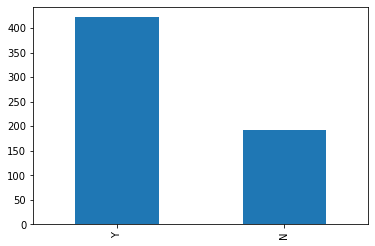

In [14]:
#bar plot for visulalisation of distribution of target variable
data['Loan_Status'].value_counts().plot.bar()

The loan of 422 people out of 614 was approved.
The approval rate is around 69%

# Categorical Variable

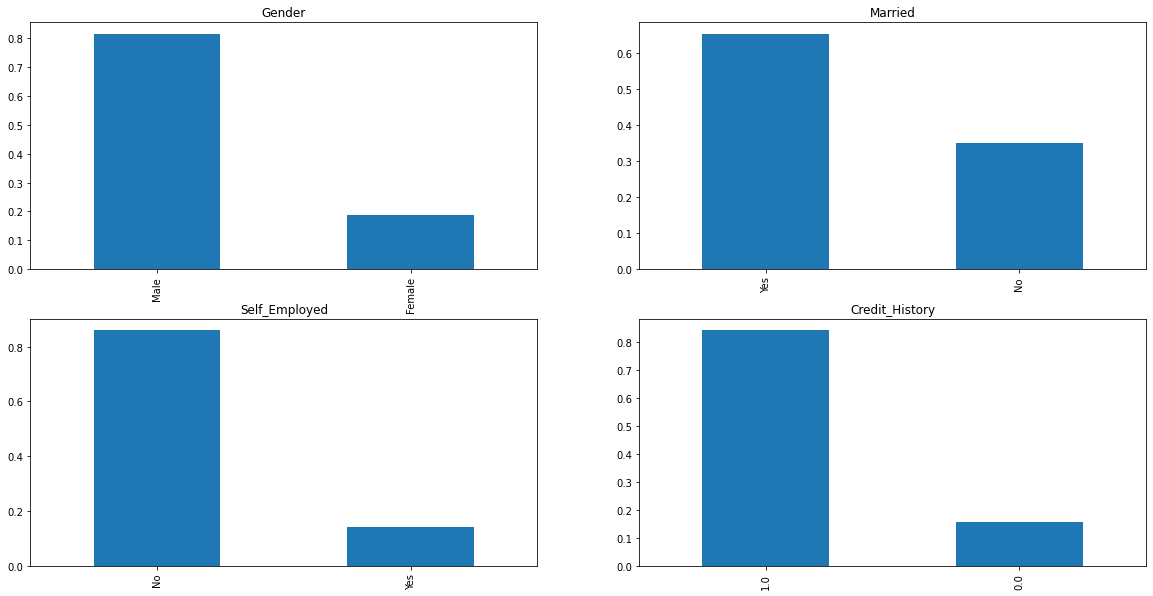

In [16]:
plt.figure(1) 
plt.subplot(221) 
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts

# Ordinal Variable

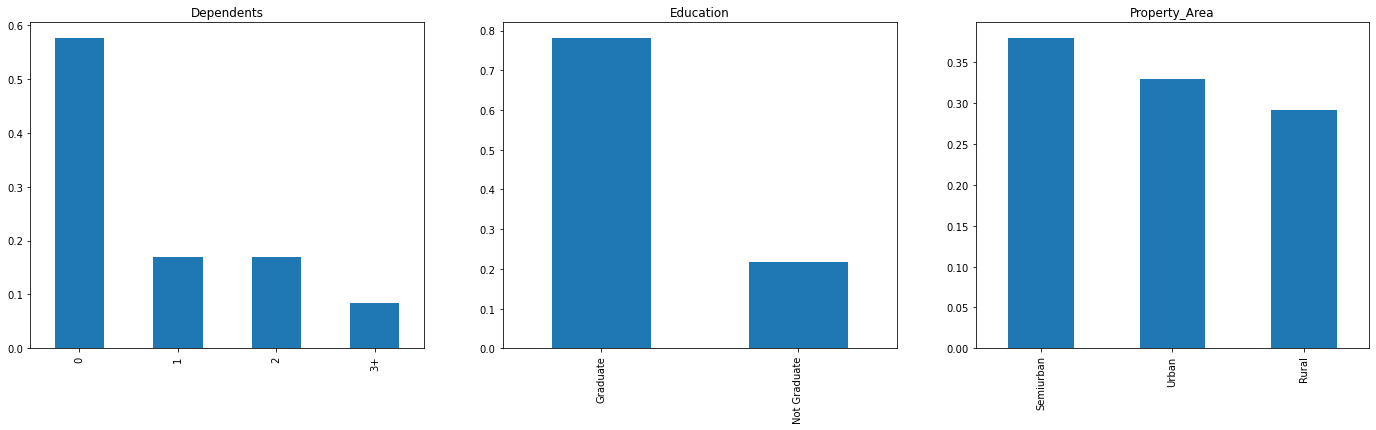

In [18]:
plt.figure(1) 
plt.subplot(131) 
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area

# Numerica Variable

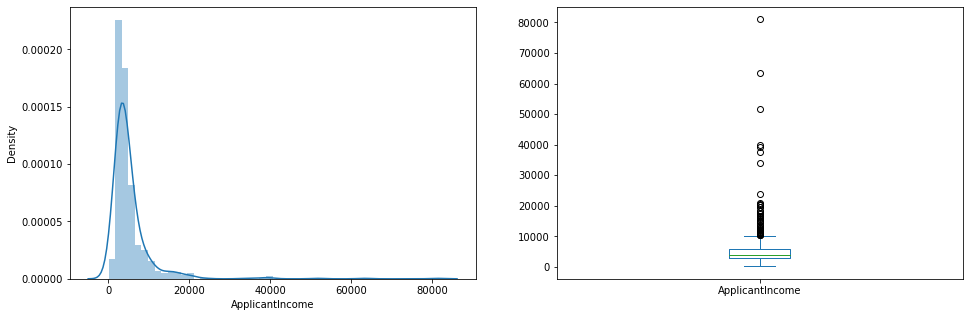

In [21]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(data['ApplicantIncome']); 
plt.subplot(122) 
data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society

Text(0.5, 0.98, '')

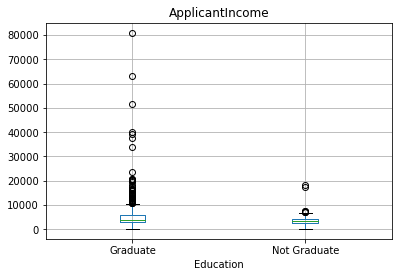

In [23]:
data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers

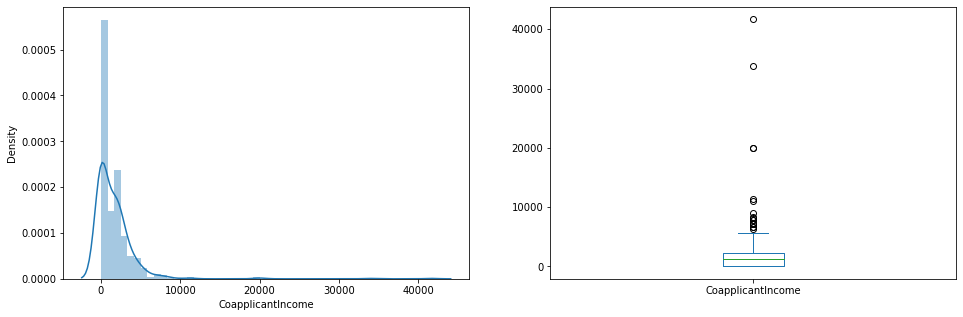

In [25]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(data['CoapplicantIncome']); 
plt.subplot(122) 
data['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Majority of coapplicant’s income ranges from 0 to 5000.
We also see a lot of outliers in the coapplicant income and it is not normally distributed

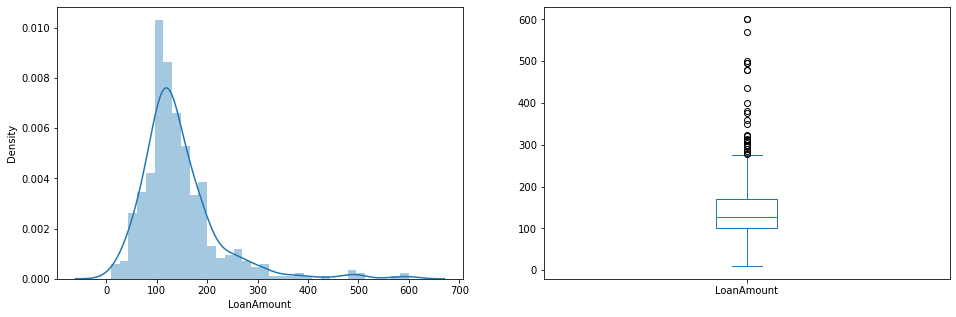

In [26]:
plt.figure(1) 
plt.subplot(121) 
df=data.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

Outliers are present
the distribution is fairly normal.

# Bivariate Analysis

Categorical Variable vs Target Variable

<AxesSubplot:xlabel='Gender'>

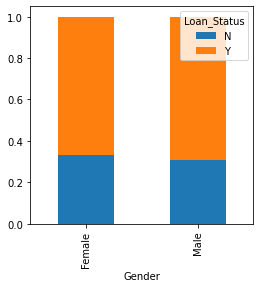

In [28]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

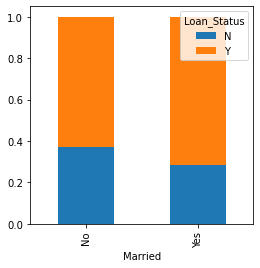

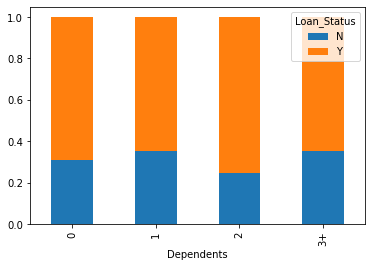

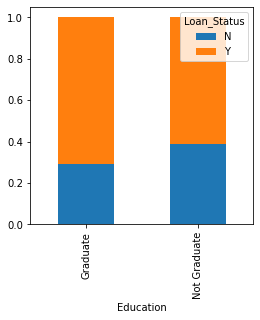

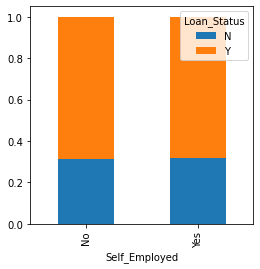

In [30]:
Married=pd.crosstab(data['Married'],data['Loan_Status']) 
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status']) 
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot

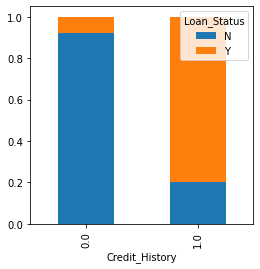

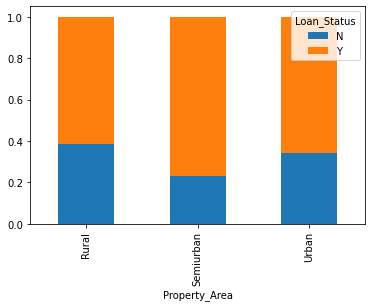

In [31]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

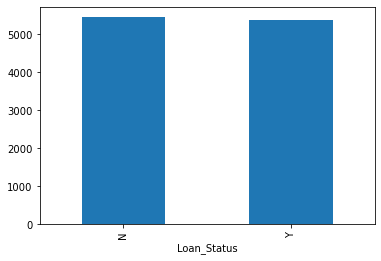

In [32]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is not visible difference between the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved

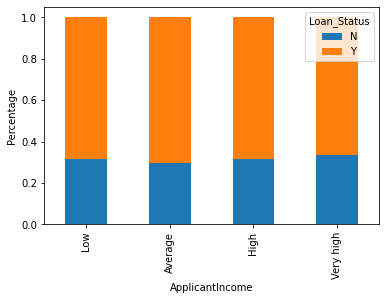

In [33]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

Analysing bins for the applicant income variable based on the values in it and the corresponding loan status for each bin.It can be inferred that Applicant income does not affect the chances of loan approval

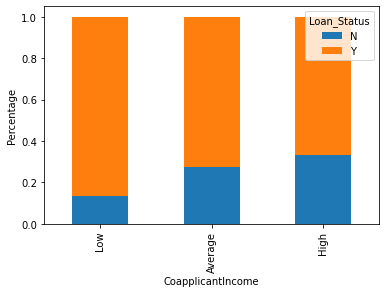

In [34]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

coapplicant’s income is less the chances of loan approval are high

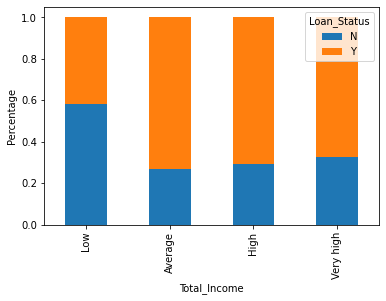

In [36]:
#new variable in which we will combine the applicant’s and coapplicant’s income t
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income

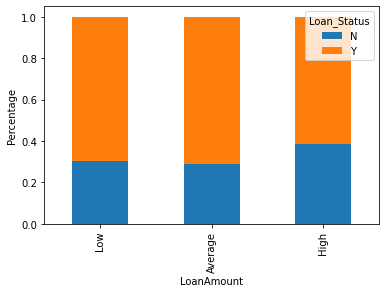

In [37]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
data['LoanAmount_bin']=pd.cut(data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount

In [39]:
# drop the bins, change the 3+ in dependents variable to 3, convert the target variable’s categories into 0 and 1 

data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
data['Dependents'].replace('3+', 3,inplace=True) 


data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

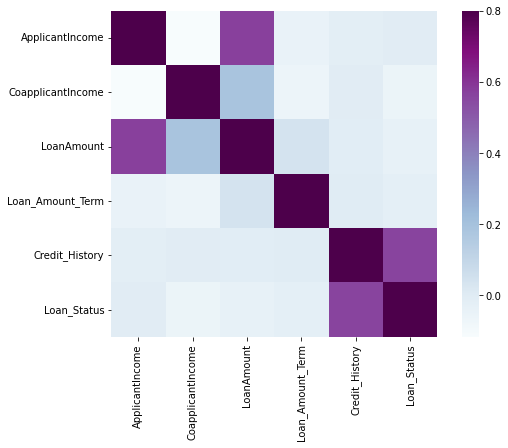

In [41]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

Highly correlated variables are (ApplicantIncome - LoanAmount)
Also (Credit_History - Loan_Status). is higly correlated
LoanAmount is also correlated with CoapplicantIncome

# Missing Values and Outlier Treatment

In [43]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.
For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [44]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True) 
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [45]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [47]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [49]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

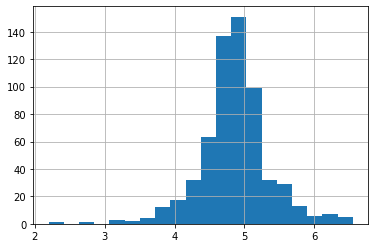

In [50]:
#log transformation
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20) 

the distribution looks much closer to normal and effect of extreme values has been significantly subsided

# Feature Engineering

In [51]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']

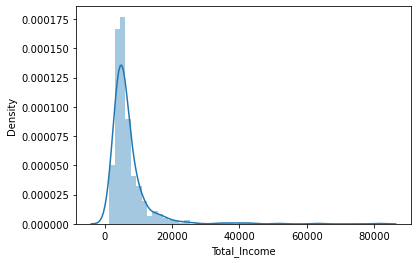

In [52]:
sns.distplot(data['Total_Income']);

Distribution is shifted towards left, i.e., the distribution is right skewed

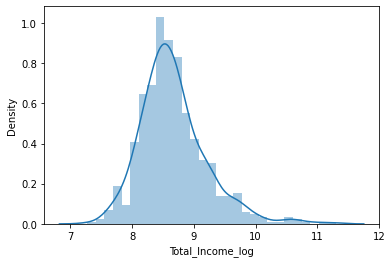

In [53]:
data['Total_Income_log'] = np.log(data['Total_Income']) 
sns.distplot(data['Total_Income_log']);

After taking the log transformation to make the distribution normal.
Now the distribution looks much closer to normal

In [55]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']

calculate the EMI by taking the ratio of loan amount with respect to loan amount term

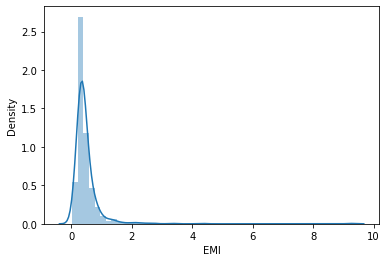

In [57]:
sns.distplot(data['EMI']);

In [58]:
# Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
data['Balance Income']=data['Total_Income']-(data['EMI']*1000)

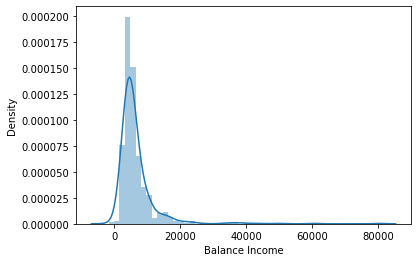

In [60]:
sns.distplot(data['Balance Income']);

In [61]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

drop the variables which we used to create these new features.
because the correlation between those old features and these new features will be very high
removing correlated features will help in reducing the noise too

# Model Building

In [63]:
#drop the Loan_ID variable 
data=data.drop('Loan_ID',axis=1) 

Loan Id is not a significant variable and d=it is not required as a feature for building mode

In [64]:
#Seperate features and target
X = data.drop('Loan_Status',1)
y = data.Loan_Status

Loan Status is target variabel so seggregating it

In [65]:
#dummy variables for the categorical variables
X=pd.get_dummies(X) 
data=pd.get_dummies(data)

Dummy variables for Categorical Variable so each category can be given as a seperate feature to the model

In [66]:
#import required libraries
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [67]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.
i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))   
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.6829268292682927

2 of kfold 5
accuracy_score 0.6422764227642277

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.6721311475409836


In [68]:
mean_accuracy = sum(accuracy_list)/ len(accuracy_list)
print(mean_accuracy)

0.7019059043049447


# conclusion

Mean Accuracy for the model is around 0.702